<r>19.10.2022 r.<r>
<h1><center>Assignment 1</center></h1>
<h2><center>Agent-based modelling of complex systems - Lab</center></h2>

<h3><center>Jakub Łuczka</center></h3>


A simple model of forest fire may be defined as a two-dimensional cellular automaton on a grid of cells, which take one of three states: empty, occupied by a
tree, burning or smoked. The automaton evolves according to the following rules, which
are executed simultaneously for every cell at a given generation:

<li>1. A burning cell turns into an empty cell.</li>
<li>2. A cell occupied by a tree becomes a burning cell, if any of its eight neighboring cells are burning.</li>

Implement the model in Python on a $L$ $×$ $L$ square lattice. At the beginning
of the simulation, every cell of the grid should be populated by a tree with
probability p. Assume that initially all trees at one of the edges are burning.

In [1]:
# Import necessery modules

# Matrix operations and calculations
import numpy as np

# Results visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Animation generation
import imageio
import os

# Control the loop processes
from tqdm import tqdm

<h3>Exercise 1</h3>

1. Find the so called percolation threshold $p^*$, i.e. the probability that fire hits the opposite edge of the grid during the simulation. Use $L$ = 20, 50 and 100 for the linear size of the lattice

In [2]:
def forest_creator(L, p):
    '''Function which creates a forest based on squared
    numpy.array size L x L with probability of forestation
    equal to p
    
    :param L : size of the forest's edge
    :type L : int
    
    :param p : probability of forestation
    :type p : float
    
    :returns: a forest based on numpy.array with ones 
    meaning trees and zeros and meaning empty space'''
    
    forest_matrix = np.zeros(shape = (L, L))

    for i in range(L):
        for j in range(L):
            if np.random.uniform() <= p:
                forest_matrix[i][j] = 1
    
    return forest_matrix


In [3]:
# Example of using forest creator
L, p = 10, 0.75
forest_example = forest_creator(L, p)
forest_example

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 0., 1., 0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 0.],
       [0., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.]])

In [45]:
def fire_forest_model(L, p, activation):
    '''Function which creates model of single simulation
    fire in a forest based on numpy.array with 4 possible 
    states: 0 - empty state, 1 - tree, 2 - burning tree and
    3 - burned tree, unitl any tree in forest are burning
    
    :param L : size of the forest's edge
    :type L : int
    
    :param p : probability of forestation
    :type p : float
    
    :param activation : activate returning bool value of catching 
                        opposite edge
    :type activation : int
    
    :returns: a smoked forest based on numpy.array with all
    possible states'''
    
    # Creating a forest on a square lattice
    forest = forest_creator(L, p)
    # Spread fire into first column (step zero)
    forest[:, 0] = forest[:, 0] * 2
    #print(forest)
    
    # Checking if fire chatches the last column with trees
    size = L
    catch_last_column = False
    
    # Doing simulations until any tree is burning
    while (np.any(forest == 2) == True):
        # Checking all rows and all columns for burning trees
        for i in range(0, size):
            for j in range(0, size):
                if forest[i, j] == 2:
                    # State 4 is temporary state which helps with burning trees detection
                    if i == 0 and j == 0:  # left top corner
                        forest[i:i+2, j:j+2] = np.where(forest[i:i+2, j:j+2] == 1, 4, forest[i:i+2, j:j+2])
                        #forest[i, j] = 2

                    elif i == 0 and 0 < j < size - 1:  # top
                        forest[i:i+2, j-1:j+2] = np.where(forest[i:i+2, j-1:j+2] == 1, 4, forest[i:i+2, j-1:j+2])
                        #forest[i, j] = 2

                    elif i == 0 and j == size - 1:  # right top corner
                        forest[i:i+2, j-1:j+1] = np.where(forest[i:i+2, j-1:j+1] == 1, 4, forest[i:i+2, j-1:j+1])
                        #forest[i, j] = 2

                    elif 0 < i < size - 1 and j == 0:  # left side
                        forest[i-1:i+2, j:j+2] = np.where(forest[i-1:i+2, j:j+2] == 1, 4, forest[i-1:i+2, j:j+2])
                        #forest[i, j] = 2

                    elif 0 < i < size - 1 and j == size - 1:  # right side
                        forest[i-1:i+2, j:j+1] = np.where(forest[i-1:i+2, j:j+1] == 1, 4, forest[i-1:i+2, j:j+1])
                        #forest[i, j] = 2

                    elif i == size - 1 and j == 0:  # left bottom corner
                        forest[i-1:i+1, j:j+2] = np.where(forest[i-1:i+1, j:j+2] == 1, 4, forest[i-1:i+1, j:j+2])
                        #forest[i, j] = 2

                    elif i == size - 1 and 0 < j < size - 1:  # bottom
                        forest[i-1:i+1, j-1:j+2] = np.where(forest[i-1:i+1, j-1:j+2] == 1, 4, forest[i-1:i+1, j-1:j+2])
                        #forest[i, j] = 2

                    elif i == size - 1 and j == size - 1:  # right bottom corner
                        forest[i-1:i+1, j-1:j+1] = np.where(forest[i-1:i+1, j-1:j+1] == 1, 4, forest[i-1:i+1, j-1:j+1])
                        #forest[i, j] = 2

                    else:
                        forest[i-1:i+2, j-1:j+2] = np.where(forest[i-1:i+2, j-1:j+2] == 1, 4, forest[i-1:i+2, j-1:j+2])
                    forest[i, j] = 2
        
        # Changing all burning to smoked states and all temporary states to burning
        for index, value in np.ndenumerate(forest):
            if forest[index] == 2:
                forest[index] = 3
            if forest[index] == 4:
                forest[index] = 2
        
        # This loop is activated when I want to check 
        if activation == 1:
            if catch_last_column == False:
                for j in range(L):
                    if forest[j, -1] == 2:
                        catch_last_column = True
                        return forest, catch_last_column
        
    if activation == 1:
        return forest, catch_last_column
    else:
        return forest


In [68]:
L, p, activation = 10, 0.3, 1
results = fire_forest_model(L, p, activation)
print('Final matrix: \n\n{0}'.format(results[0]))
print('')
print('Catch opposite edge: {0}'.format(results[1]))

Final matrix: 

[[3. 0. 0. 0. 3. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 3. 3. 0. 0. 0. 0.]
 [0. 3. 0. 3. 0. 3. 0. 0. 0. 0.]
 [3. 0. 3. 3. 0. 0. 0. 1. 0. 1.]
 [0. 3. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 3. 3. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]]

Catch opposite edge: False


In [42]:
def fire_monte_carlo(L, prob_linspace, monte_carlo):
    '''Function which creates model of single simulation
    fire in a forest based on numpy.array with 4 possible 
    states: 0 - empty state, 1 - tree, 2 - burning tree and
    3 - burned tree, unitl any tree in forest are burning
    
    :param L : size of the forest's edge
    :type L : int
    
    :param p : splliting probability of forestation between 0 and 1
               (for example p = 50 -> p1 = 0, p2 = 0.02, p3 = 0.04...)
    :type p : int
    
    :param monte_carlo : number of simulations for single probability
    :type activation : int
    
    :returns: an array with results with average probability of catching
    opposite edge for every single probability'''
    
    results = np.zeros(prob_linspace)
    activation = 1
    
    for j in tqdm(range(0, 100), desc = 'Progress'):
        probability = float(j / prob_linspace)
        count = 0
        for i in range(monte_carlo):
            catch_fire = fire_forest_model(L, probability, activation)
            if catch_fire[1] == True:
                count += 1
        results[j] = count / monte_carlo
    
    return results


In [46]:
L20_results = fire_monte_carlo(20, 100, 100)

Progress: 100%|██████████| 100/100 [03:07<00:00,  1.88s/it]


In [47]:
L50_results = fire_monte_carlo(50, 100, 100)

Progress: 100%|██████████| 100/100 [38:05<00:00, 22.86s/it]


In [115]:
L100_results = fire_monte_carlo(100, 100, 100)

Progress: 100%|██████████| 100/100 [3:30:59<00:00, 126.59s/it] 


In [156]:
def forest_fire_chart(L20_lattice, L50_lattice, L100_lattice):
    '''Plotting the comparison of probability of catching the
    opposite edge for every probability of forestation on the
    lattice 20x20, 50x50 and 100x100
    
    :param L20_lattice : results for lattice 20x20
    :type L20_lattice : np.array
    
    :param L50_lattice : results for lattice 50x50
    :type L50_lattice : np.array
    
    :param L100_lattice : results for lattice 100x100
    :type L100_lattice : np.array
    
    :returns: graph witch shows relationship between probability 
    of catching the opposite edge and probability of forestation 
    for three lattices'''
    
    # Linspace of probability of forestation
    probability = np.linspace(0, 1, len(L20_lattice))
    
    sns.reset_defaults()
    sns.set_style('darkgrid')
    plt.figure(figsize = (9, 5))
    
    plt.plot(probability, L20_lattice, linestyle = 'dotted', label = 'Lattice 20 x 20')
    plt.plot(probability, L50_lattice, linestyle = 'dashed', label = 'Lattice 50 x 50')
    plt.plot(probability, L100_lattice, linestyle = 'dashdot', label = 'Lattice 100 x 100')
    
    plt.xlabel('Probability of forestation', fontsize = 8)
    plt.ylabel('Mean probability of cathching opposite edge', fontsize = 8)
    plt.title('Probability of cathching opposite edge by fire on the square lattice', fontsize = 10)
    plt.legend(fontsize = 7)
    plt.savefig('Lattice_threshold_comparison.jpg')
    plt.show()
 

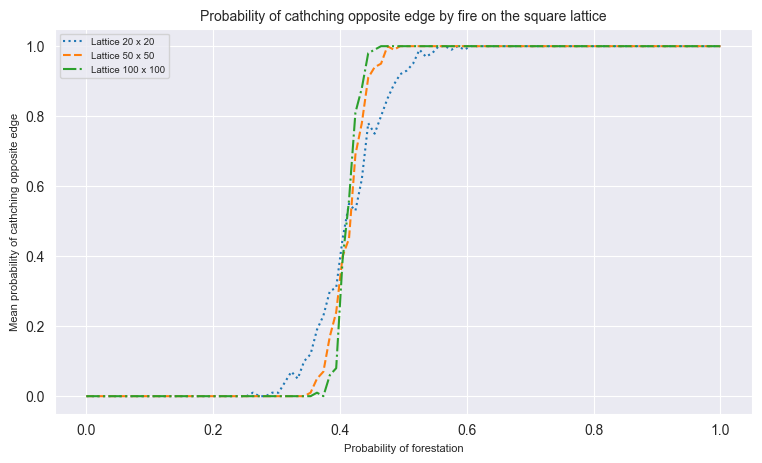

In [157]:
forest_fire_chart(L20_results, L50_results, L100_results)

It is clear to see that with bigger square lattice the line become more vertical and the threshold of catching opposite edge of the lattice evry single time is achieved quicker than for smaller lattices. 

<h3>Finding threshold</h3>

In [121]:
import pandas as pd

df = pd.DataFrame()

df['20x20_lattice'] = L20_results
df['50x50_lattice'] = L50_results
df['100x100_lattice'] = L100_results

print(df)

    20x20_lattice  50x50_lattice  100x100_lattice
0             0.0            0.0              0.0
1             0.0            0.0              0.0
2             0.0            0.0              0.0
3             0.0            0.0              0.0
4             0.0            0.0              0.0
..            ...            ...              ...
95            1.0            1.0              1.0
96            1.0            1.0              1.0
97            1.0            1.0              1.0
98            1.0            1.0              1.0
99            1.0            1.0              1.0

[100 rows x 3 columns]


In [122]:
df.to_csv('Lattice_threshold_comparison.csv')

In [124]:
lattice = pd.read_csv('Lattice_threshold_comparison.csv', index_col=0)
lattice.describe([0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55])

,20x20_lattice,50x50_lattice,100x100_lattice
count,100.000000,100.000000,100.000000
mean,0.583800,0.586500,0.587600
std,0.462511,0.479236,0.485335
min,0.000000,0.000000,0.000000
20%,0.000000,0.000000,0.000000
30%,0.010000,0.000000,0.000000
35%,0.113000,0.006500,0.000000
40%,0.394000,0.336000,0.266000
45%,0.766500,0.926500,0.985500
50%,0.925000,1.000000,1.000000


In [125]:
lattice.shape

(100, 3)

In [126]:
def threshold_finder(lattice):
    '''Finding threshold  percolation threshold p*, 
    i.e. the probability that fire hits the opposite 
    edge of the grid during the simulation
    
    :param lattice : object with results for any lattice
    :type lattice : csv file
    
    :returns: printed lattice with calculated threshold'''
    for j in range(lattice.shape[1]):
        for i in range(lattice.shape[0]):
            if round(lattice.iloc[i, j], 5) == 1:
                if j == 0:
                    print('Lattice 20 x 20 -> threshold = {0}'.format(i / 100))
                elif j == 1:
                    print('Lattice 50 x 50 -> threshold = {0}'.format(i / 100))
                else:
                    print('Lattice 100 x 100 -> threshold = {0}'.format(i / 100))
                break

In [127]:
threshold_finder(lattice)

Lattice 20 x 20 -> threshold = 0.55
Lattice 50 x 50 -> threshold = 0.47
Lattice 100 x 100 -> threshold = 0.46


As we can observe before on the graph, for smaller lattices the threshold is achieved slower and for the bigger probability of forestation than for the larger lattices. Difference is significantly - from $0.55$ for $20$x$20$ to $0.47$ for $50$x$50$.  As the threshold line is only a little bit more vertical for $50$x$50$ than for $100$x$100$, the difference between them is not as very as for previous ones.

<h3>Animation part</h3>

In [71]:
# Colors palette
color_list = {0: np.array([255, 255, 255]), # empty - white
              1: np.array([7, 198, 0]), # tree - green
              2: np.array([219, 0, 0]), # burning tree - red
              3: np.array([141, 141, 141])} # smoked tree - gray

def colors_map(forest, color_map):
    '''Function which creates one state of fire in
    forest based on given square matrix of forest with 
    setting color map
    
    : param forest : a matrix with state of the fire in forest
    : type forest : np.array
    
    : param color_map : colors palette for every state in the forest
    : type color_map : dict
    
    :returns: plot colorful map of the given state of fire in forest'''
    
    sns.reset_defaults()
    # Creating a mask for every color
    data_3d = np.ndarray(shape = (forest.shape[0], forest.shape[1], 3), dtype = int)
    # Setting correct color to every cell
    for i in range(0, forest.shape[0]):
        for j in range(0, forest.shape[1]):
            data_3d[j, i] = color_map[forest[j, i]]
    
    fig, ax = plt.subplots(1, 1, figsize = (12, 7))
    # Setting correct text for every cell
    for i in range(0, forest.shape[0]):
        for j in range(0, forest.shape[1]):
            c = forest[j,i]
            ax.text(i, j, str(c), va='center', ha='center')
    
    ax.imshow(data_3d)


In [60]:
def fire_forest_model_animataion(L, p):
    '''Function which creates model of single simulation
    fire in a forest based on numpy.array
    
    :param L : size of the forest's edge
    :type L : int
    
    :param p : probability of forestation
    :type p : float

    :returns: an animation (gif) with spreading fire into the forest'''
    forest = forest_creator(L, p)
    # Count for every image to load and save all as a gif
    step, size = 0, L
    
    # Generating an output
    plt.figure(figsize = (12, 7))

    colors_map(forest, color_list)
    nazwa = 'step' + str(step) + '.jpg'
    plt.title('Step ' + str(step))
    plt.savefig(nazwa, bbox_inches='tight')
    plt.close()
    step += 1
    
    # Spread fire into first column (step zero)
    forest[:, 0] = forest[:, 0] * 2
    
    colors_map(forest, color_list)
    nazwa = 'step' + str(step) + '.jpg'
    plt.title('Step ' + str(step))
    plt.savefig(nazwa, bbox_inches='tight')
    plt.close()
    step += 1
    
    # Checking if fire chatches the last column with trees
    catch_last_column = False
    i = 0
    
    # Doing simulations until any tree is burning
    while (np.any(forest == 2) == True):
        # Checking all rows and all columns for burning trees
        for i in range(0, size):
            for j in range(0, size):
                if forest[i, j] == 2:
                    # State 4 is temporary state which helps with burning trees detection
                    if i == 0 and j == 0:  # left top corner
                        forest[i:i+2, j:j+2] = np.where(forest[i:i+2, j:j+2] == 1, 4, forest[i:i+2, j:j+2])
                        #forest[i, j] = 2

                    elif i == 0 and 0 < j < size - 1:  # top
                        forest[i:i+2, j-1:j+2] = np.where(forest[i:i+2, j-1:j+2] == 1, 4, forest[i:i+2, j-1:j+2])
                        #forest[i, j] = 2

                    elif i == 0 and j == size - 1:  # right top corner
                        forest[i:i+2, j-1:j+1] = np.where(forest[i:i+2, j-1:j+1] == 1, 4, forest[i:i+2, j-1:j+1])
                        #forest[i, j] = 2

                    elif 0 < i < size - 1 and j == 0:  # left side
                        forest[i-1:i+2, j:j+2] = np.where(forest[i-1:i+2, j:j+2] == 1, 4, forest[i-1:i+2, j:j+2])
                        #forest[i, j] = 2

                    elif 0 < i < size - 1 and j == size - 1:  # right side
                        forest[i-1:i+2, j:j+1] = np.where(forest[i-1:i+2, j:j+1] == 1, 4, forest[i-1:i+2, j:j+1])
                        #forest[i, j] = 2

                    elif i == size - 1 and j == 0:  # left bottom corner
                        forest[i-1:i+1, j:j+2] = np.where(forest[i-1:i+1, j:j+2] == 1, 4, forest[i-1:i+1, j:j+2])
                        #forest[i, j] = 2

                    elif i == size - 1 and 0 < j < size - 1:  # bottom
                        forest[i-1:i+1, j-1:j+2] = np.where(forest[i-1:i+1, j-1:j+2] == 1, 4, forest[i-1:i+1, j-1:j+2])
                        #forest[i, j] = 2

                    elif i == size - 1 and j == size - 1:  # right bottom corner
                        forest[i-1:i+1, j-1:j+1] = np.where(forest[i-1:i+1, j-1:j+1] == 1, 4, forest[i-1:i+1, j-1:j+1])
                        #forest[i, j] = 2

                    else:
                        forest[i-1:i+2, j-1:j+2] = np.where(forest[i-1:i+2, j-1:j+2] == 1, 4, forest[i-1:i+2, j-1:j+2])
                    forest[i, j] = 2
                    
        for index, value in np.ndenumerate(forest):
            if forest[index] == 2:
                forest[index] = 3
            if forest[index] == 4:
                forest[index] = 2
        
        colors_map(forest, color_list)
        nazwa = 'step' + str(step) + '.jpg'
        plt.title('Step ' + str(step))
        plt.savefig(nazwa, bbox_inches='tight')
        plt.close()
        step += 1 
    
    images = []
    for i in range(step):
        img = 'step' + str(i) + '.jpg'
        images.append(imageio.v2.imread(img))
    imageio.mimsave('Fire_Spreading.gif', images, duration=1)
    for j in range(step):
        if os.path.exists('step' + str(j) + '.jpg'):
            os.remove('step' + str(j) + '.jpg')
    

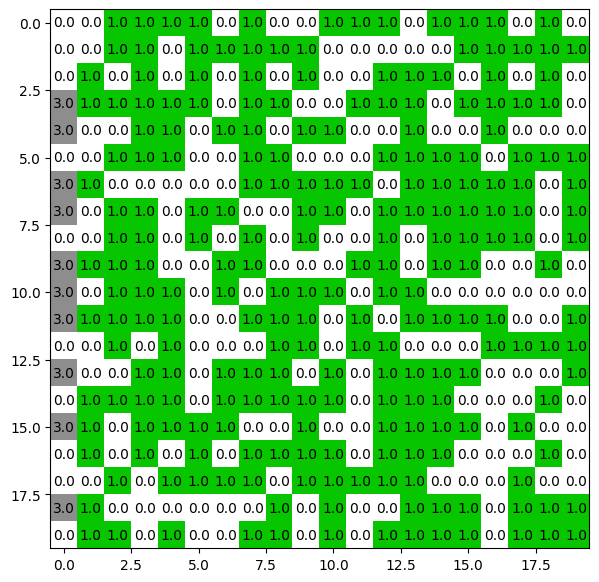

In [72]:
L, p = 20, 0.6
forest_example = forest_creator(L, p)

forest_example[:, 0] = forest_example[:, 0] * 3
colors_map(forest_example, color_list)

In [62]:
fire_forest_model_animataion(20, 0.6)

<Figure size 1200x700 with 0 Axes>

<img src="Fire_Spreading.gif" width="600" align="center">

<h3>Exercise 2</h3>

2. Plot the average size of the biggest cluster of burned threes as a function of p for L = 100. Use the <a href="https://
en.wikipedia.org/wiki/Hoshen-Kopelman_algorithm">Hoshen-Kopelman algorithm</a> for cluster detection.

In [112]:
def cluster_searching(forest):
    '''Searching for the biggest cluster of smoked trees in forest
    based on Hoshen-Kopelman algorithm, but with consideration of
    crossing neighbours
        
    : param forest : final step of burning forest with three states 
                     0 - empty space, 1 - trees and 3 - smoked trees 
    : type forest : np.array
       
    :returns: size of the biggest cluster (number of elements with the
    same ID)'''
    
    # Help function used to merge labels if there any revisions        
    def ID_merging(merged, to):
        for m in merged:
            labels[labels == m] = to
            if m != to:
                ID_list.remove(m)
                
    ID_list = []
    actual_ID = 1
    L = forest.shape[0]
    labels = np.zeros((L, L))
    
    # Going through all elements in forest array
    for i in range(L):
        for j in range(L):
            # Checking for smoked trees
            if forest[i, j] == 3:
                neighbours_ID_list = []
                neighbourhood = [(i-1, j-1), (i-1, j), (i-1, j+1), (i, j-1)]
                # Looking for IDs of the neighbourhood
                for first_neighbour, second_neighbour in neighbourhood:
                    # Be sure that element exists in array
                    if first_neighbour >= 0 and second_neighbour >= 0:
                        try:
                            # Cheking ID for neighbour (if it achieved status of smoked tree) 
                            if forest[first_neighbour, second_neighbour] == 3:
                                if labels[first_neighbour, second_neighbour] not in neighbours_ID_list:
                                    neighbours_ID_list.append(labels[first_neighbour, second_neighbour])
                        except:
                            pass
                if not neighbours_ID_list:
                    # Adding new ID to main list
                    labels[i, j] = actual_ID
                    ID_list.append(actual_ID)
                    actual_ID = actual_ID + 1
                else:
                    # Taking minimum of IDs and changing ID for all neighbourhood
                    labels[i, j] = min(neighbours_ID_list)
                    ID_merging(neighbours_ID_list, min(neighbours_ID_list))
                    
    biggest_cluster = 0
    
    # Searching for number of each cluster in the forest
    for ID in ID_list:
        ID_counter = np.sum(np.where(labels == ID, 1, 0))
        # Change biggest cluster if actual is bigger
        if ID_counter > biggest_cluster:
            biggest_cluster = ID_counter
    
    return biggest_cluster


In [113]:
def cluster_monte_carlo(L, prob_linspace, monte_carlo):
    '''Function which creates model of single simulation
    fire in a forest based on numpy.array with 4 possible 
    states: 0 - empty state, 1 - tree, 2 - burning tree and
    3 - burned tree, unitl any tree in forest are burning
    
    :param L : size of the forest's edge
    :type L : int
    
    :param p : splliting probability of forestation between 0 and 1
               (for example p = 50 -> p1 = 0, p2 = 0.02, p3 = 0.04...)
    :type p : int
    
    :param monte_carlo : number of simulations for single probability
    :type activation : int
    
    :returns: an array with results with average probability of catching
    opposite edge for every single probability'''
    
    results = np.zeros(prob_linspace)
    activation = 0
    
    for j in tqdm(range(0, 100), desc = 'Progress'):
        probability = float(j / prob_linspace)
        count = 0
        for i in range(monte_carlo):
            smoked_trees = fire_forest_model(L, probability, activation)
            biggest_cluster = cluster_searching(smoked_trees)
            count += biggest_cluster
        results[j] = count / monte_carlo
    
    return results


In [52]:
L20_cluster = cluster_monte_carlo(20, 100, 100)

Progress: 100%|██████████| 100/100 [01:51<00:00,  1.12s/it]


In [56]:
L50_cluster = cluster_monte_carlo(50, 100, 100)

Progress: 100%|██████████| 100/100 [20:07<00:00, 12.08s/it]


In [73]:
L100_cluster = cluster_monte_carlo(100, 100, 100)

Progress: 100%|██████████| 100/100 [2:06:48<00:00, 76.08s/it]  


In [75]:
import pandas as pd
dataframe_cluster = pd.DataFrame()

dataframe_cluster['20x20_lattice'] = L20_cluster
dataframe_cluster['50x50_lattice'] = L50_cluster
dataframe_cluster['100x100_lattice'] = L100_cluster

print(dataframe_cluster)

    20x20_lattice  50x50_lattice  100x100_lattice
0            0.00           0.00             0.00
1            0.20           0.46             0.60
2            0.36           0.72             1.08
3            0.36           1.06             1.34
4            0.66           1.24             1.44
..            ...            ...              ...
95         379.92        2374.66          9497.08
96         383.96        2401.60          9600.76
97         387.46        2426.02          9701.04
98         392.12        2448.28          9799.24
99         395.88        2474.50          9900.78

[100 rows x 3 columns]


In [77]:
dataframe_cluster.to_csv('Avg_cluster_comparison.csv')

In [78]:
lattice = pd.read_csv('Avg_cluster_comparison.csv', index_col=0)
lattice.describe()

,20x20_lattice,50x50_lattice,100x100_lattice
count,100.000000,100.000000,100.000000
mean,164.741200,1023.493600,4085.393200
std,142.164833,909.120824,3669.310701
min,0.000000,0.000000,0.000000
25%,9.770000,15.595000,19.560000
50%,170.100000,1165.160000,4782.490000
75%,296.610000,1855.005000,7423.210000
max,395.880000,2474.500000,9900.780000


In [161]:
def fire_cluster_chart(lattice_20, lattice_50, lattice_100, label):
    '''Plotting the relationship between average size of biggest 
    cluster of smoked trees and every probability of forestation 
    on the lattice sized 100x100
    
    :param L100_lattice : results for lattice 100x100
    :type L100_lattice : np.array
    
    :returns: graph witch shows relationship between average 
    size of biggest cluster of smoked trees and 
    probability of forestation for given lattice'''
    
    # Linspace of probability of forestation
    probability = np.linspace(0, 1, len(lattice))
    
    sns.reset_defaults()
    sns.set_style('darkgrid')
    
    if label == 0:
        fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(15, 6))
        
        ax0.plot(probability, lattice_20, linestyle = 'dotted', label = 'Lattice 20 x 20')
        ax0.set_xlabel('Probability of forestation', fontsize = 9)
        ax0.set_ylabel('Avg. size of biggest cluster of smoked trees', fontsize = 9)
        ax0.set_title('Lattice 20 x 20', fontsize = 9)
        
        ax1.plot(probability, lattice_50, linestyle = 'dotted', label = 'Lattice 50 x 50')
        ax1.set_xlabel('Probability of forestation', fontsize = 9)
        #ax1.set_ylabel('Avg. size of biggest cluster of smoked trees', fontsize = 9)
        ax1.set_title('Lattice 50 x 50', fontsize = 9)
        
        ax2.plot(probability, lattice_100, linestyle = 'dotted', label = 'Lattice 100 x 100')
        ax2.set_xlabel('Probability of forestation', fontsize = 9)
        #ax2.set_ylabel('Avg. size of biggest cluster of smoked trees', fontsize = 9)
        ax2.set_title('Lattice 100 x 100', fontsize = 9)
        
        fig.suptitle('Relationship between perlocation and size of biggest smoked cluster on the square lattice', fontsize = 11, weight = 'bold')
        plt.savefig('Avg_cluster_comparison_separately.jpg')
        plt.show()
    
    else:
        plt.figure(figsize = (15, 6))
        
        plt.plot(probability, lattice_20, linestyle = 'dotted', label = 'Lattice 20 x 20')
        plt.plot(probability, lattice_50, linestyle = 'dashed', label = 'Lattice 50 x 50')
        plt.plot(probability, lattice_100, linestyle = 'dashdot', label = 'Lattice 100 x 100')
        
        plt.xlabel('Probability of forestation', fontsize = 10)
        plt.ylabel('Avg. size of biggest cluster of smoked trees', fontsize = 10)
        plt.title('Relationship between perlocation and size of biggest smoked cluster on the square lattice', fontsize = 11, weight = 'bold')
        plt.legend(fontsize = 9)
        plt.savefig('Avg_cluster_comparison.jpg')
        plt.show()


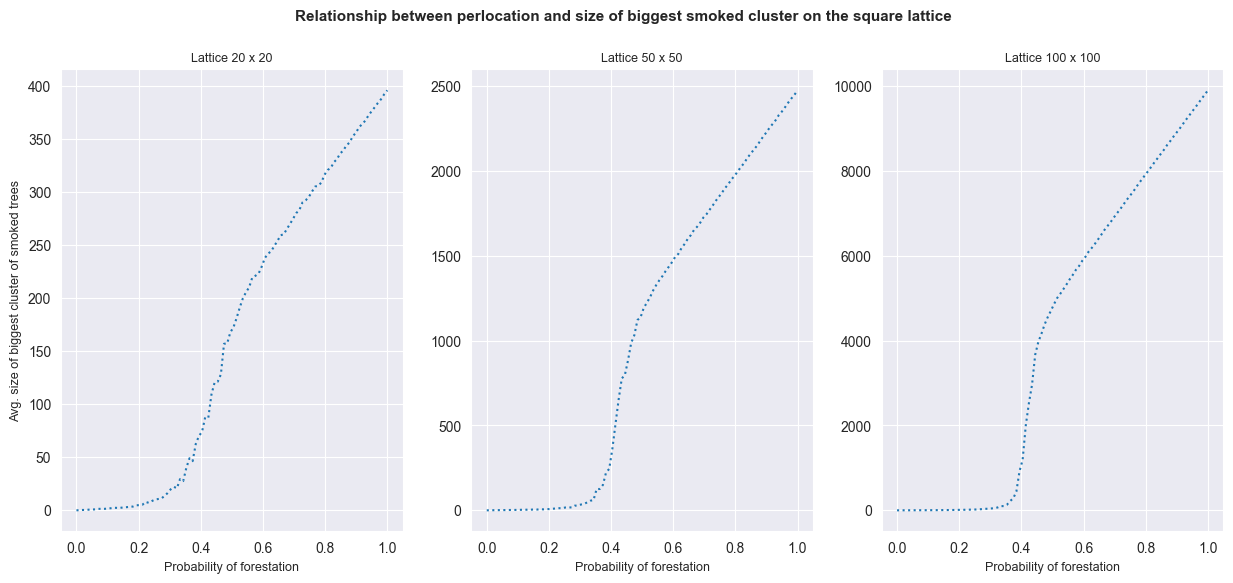

In [159]:
fire_cluster_chart(L20_cluster, L50_cluster, L100_cluster, 0)

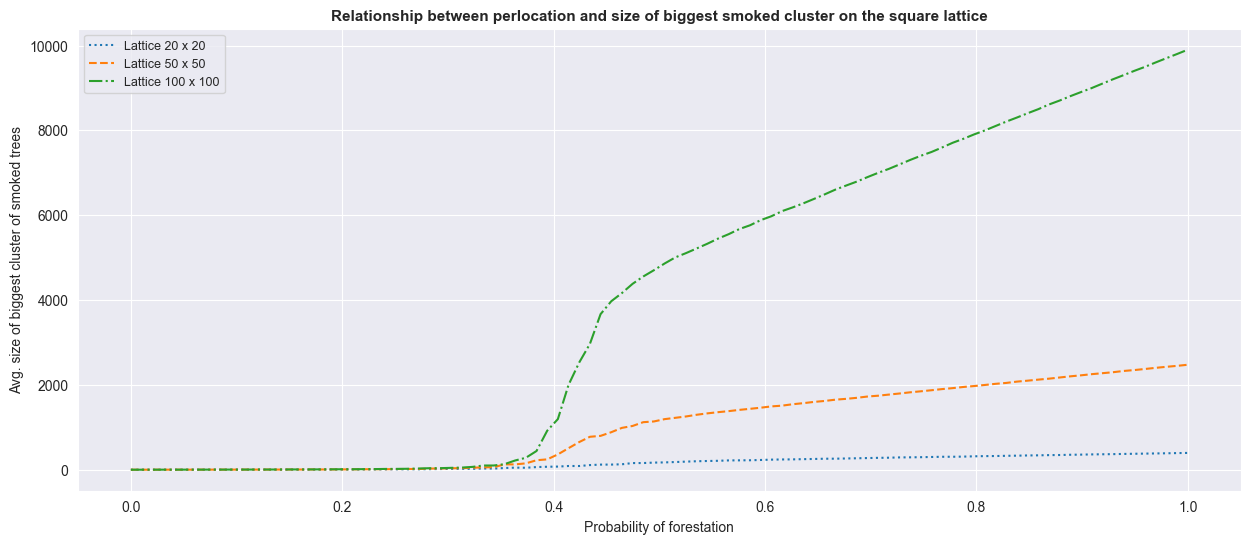

In [162]:
fire_cluster_chart(L20_cluster, L50_cluster, L100_cluster, 1)

As we can suppose, the average biggest cluster of smoked (burned) trees is the square of size of the edge when the probability of forestation goes to the 1. Probabilities are growing very similar to each other (obviously with a sense of proportion), but as before the results for bigger lattice are more smoother than for little one.